# Exploratory Data Analysis and Visualization

# Introduction

More and more consumers seek product information from other consumers apart from the information provided by the seller. Reviews and ratings submitted by consumers are examples of such of type of information and they have already become an integral part of customer’s buying-decision process. The review and ratings platform provided by eCommerce players creates transparent system for consumers to take informed decision and feel confident about it.

## Dataset

- The Amazon Dataset (Apps for Androids) is used for analysis and can be found here: .
- It contains over 750,000 reviews of Amazon Apps for Androids applied to 13,200 products by 87,000 users.
- It consists of the following information:
    - UserID
    - ProductID
    - UserName
    - UserNickname
    - Number of people who have voted if this review is helpful or not
    - Number of people who have voted that the review is helpful
    - Rating (1 - 5 stars)
    - Review
    - A summary of the review
    - Timestamp of the review


## Motivation

- Understand the trend in average ratings over years (from 1994 to 2014)
- This will give us an insight about how the people’s liking over time

In [19]:
# Own libraries
import datapreprocessing as dp
import matrix_factorization as mf


import numpy as np
import pandas as pd
import torch

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the data

In [29]:
df_Apps = dp.getDF("Apps_for_Android_5.json")
df_Apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752937 entries, 0 to 752936
Data columns (total 9 columns):
reviewerID        752937 non-null object
asin              752937 non-null object
reviewerName      694739 non-null object
helpful           752937 non-null object
reviewText        752937 non-null object
overall           752937 non-null float64
summary           752937 non-null object
unixReviewTime    752937 non-null int64
reviewTime        752937 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 57.4+ MB


In [31]:
df_Apps.describe() # result: asymetic?

,overall,unixReviewTime
count,752937.000000,7.529370e+05
mean,3.968931,1.368442e+09
std,1.342484,2.342230e+07
min,1.000000,1.134778e+09
25%,3.000000,1.354147e+09
50%,5.000000,1.370477e+09
75%,5.000000,1.388448e+09
max,5.000000,1.406074e+09


### Create a dataframe with users, items and ratings

In [6]:
df_user_item_rating = df_Apps[['reviewerID', 'asin', 'overall']]
df_user_item_rating.head()

,reviewerID,asin,overall
0,A1N4O8VOJZTDVB,B004A9SDD8,3.0
1,A2HQWU6HUKIEC7,B004A9SDD8,5.0
2,A1SXASF6GYG96I,B004A9SDD8,5.0
3,A2B54P9ZDYH167,B004A9SDD8,5.0
4,AFOFZDTX5UC6D,B004A9SDD8,5.0


In [ ]:
# Save our cleaned data in csv
# df_user_item_rating.to_csv('cleaned_user_item_rating.csv')

# Explorative Data Analysis (EDA)

In [7]:
# total number of ratings
total_num_ratings = len(df_user_item_rating.overall)
print('{} ratings'.format(total_num_ratings))

752937 ratings


In [8]:
# number of unique users
n_users = df_user_item_rating.reviewerID.unique().shape[0]
print('{} unique users'.format(n_users))

87271 unique users


In [9]:
# number of unique items
n_items = df_user_item_rating.asin.unique().shape[0]
print('{} unique items'.format(n_items))

13209 unique items


In [10]:
# sparsity of the user-item matrix
sparsity = float(total_num_ratings) / (n_users * n_items) * 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 0.07%


# Distribution of ratings

We first look at the distribution of ratings among all of the reviews.

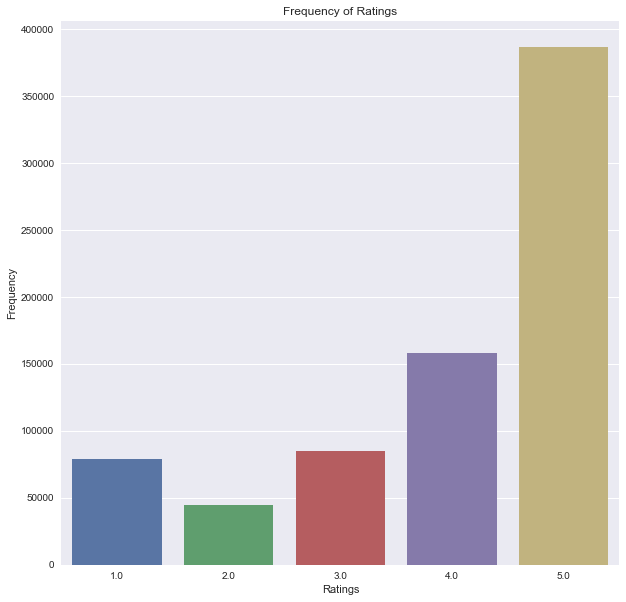

In [34]:
plt.figure(figsize=(10,10))
#plt.hist(df_user_item_rating.overall, bins=5)
sns.countplot(df_user_item_rating.overall)
plt.title('Frequency of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean_ratings = 

# mean_ratings = ratings.groupby(['timestamp', 'genres'], as_index=False)['rating'].aggregate(np.mean)

rating matrix with one row per user and one column per movie using the 'pivot table' function

In [ ]:
ratings = df_Apps.pivot(index='reviewerID', columns='asin', values='overall').fillna(0)

In [ ]:
ratings.head(50)

# Matrix Factorization

In [ ]:
# normalize into [0,1]
def normalize(ratings):
    ratings = ratings.copy()
    max_ratings = ratings.max()
    ratings = ratings*1.0/max_ratings
    return ratings

In [ ]:
normalize(df_Apps['overall'])

In [ ]:
model = mf.MatrixFactorization(n_users, n_items)

In [ ]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
# Loss with L_2 regularization
#reg_loss_fn = torch.optim.SGD(model.parameters(), lr=1e-6,
#                             weight_decay=1e-5)

In [ ]:
# Sort our data
rows, cols = ratings.nonzero()
p = np.random.permutation(len(rows))
rows, cols = rows[p], cols[p]

In [ ]:
for row, col in zip(*(rows, cols)):
    # Turn data into variables
    rating = torch.FloatTensor([ratings[row, col]])
    row = torch.LongTensor([np.long(row)])
    col = torch.LongTensor([np.long(col)])

    # Predict and calculate loss
    prediction = model(row, col)
    loss = loss_fn(prediction, rating)

    # Backpropagate
    loss.backward()

    # Update the parameters
    optimizer.step()

    # Print
    print(loss)